Sentiment analysis is the interpretation and classification of emotions (positive, negative, and neutral) in text data using text analysis techniques. Sentiment analysis tools allow businesses to;
* Identify customer sentiment towards products, 
* Brands or services in online reviews. 

In this project we will do twitter sentiment analysis with Natural Language Processing using the `nltk` library.

**Twitter Sentiment Analysis** is the process of computationally identifying and categorizing tweets expressed in a piece of text, especially in order to determine whether the writer’s attitude towards a particular topic, product, etc. is positive, negative, or neutral.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

First of all, splitting the data set into a training and a testing set. The test set is the 10% of the original data set.

For this particular analysis we are dropping a neutral tweets, as our goal is to only differentiate positive and negative tweets.

In [3]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

As a next step, we are separating Positive and Negative tweets of the training set in order to easily visualize their contained words.

After that we will clean text from hashtags, mentions and links. Then they will be ready for a WordCloud visualization which shows only the most emphatic words of the Positive and Negative tweets.

In [4]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

In [5]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

Positive words


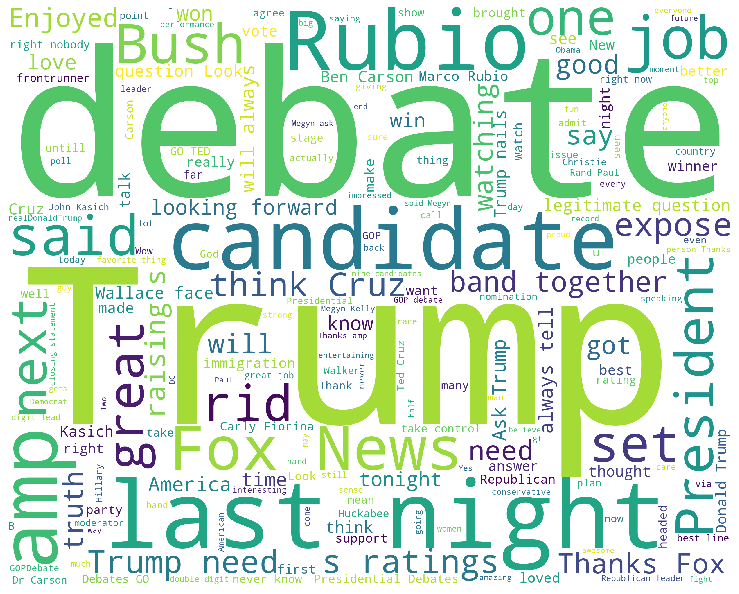

Negative words


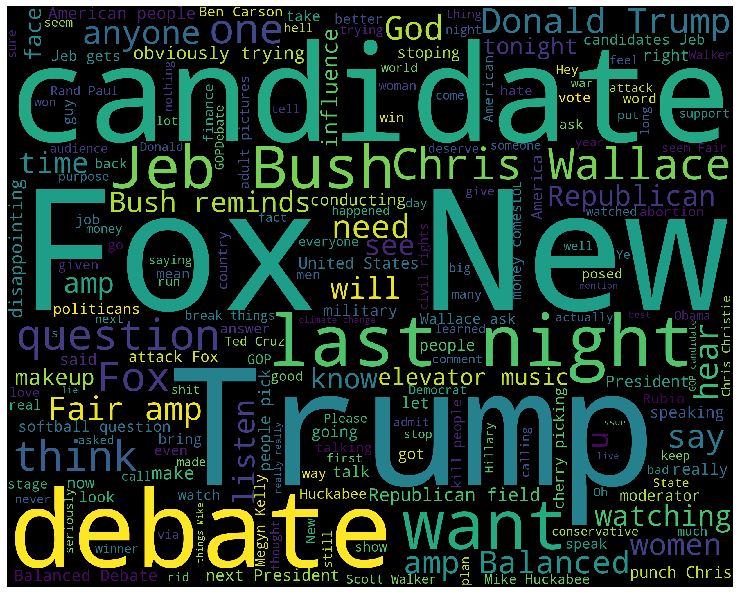

In [6]:
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Interesting to notice the following words and expressions in the positive word set: **truth**, **strong**, **legitimate**, **together**, **love**, **job**. In our interpretation, people tend to believe that their ideal candidate is truthful and legitimate.

At the same time, negative tweets contains words like: **influence, news, elevatormusic, disappointing, softball, makeup, cherry picking, trying**. In our understanding people missed the decisively acting and considered the scolded candidates too soft and cherry picking.

After vizualization, we will remove hashtags, mentions, links and stopwords from the training set.

**Stop Word**: Stop Words (the, for, this etc. ) are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information 

In [7]:
tweets = []
stopwords_set = set(stopwords.words("english"))

In [8]:
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

In [9]:
test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

As a next step we will extract features with **nltk** library, first by measuring a frequent distribution and by selecting the resulting keys.

In [10]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

In [11]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

In [12]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

Hereby we are ploting most frequently distributed words. The most words are centered around debate nights

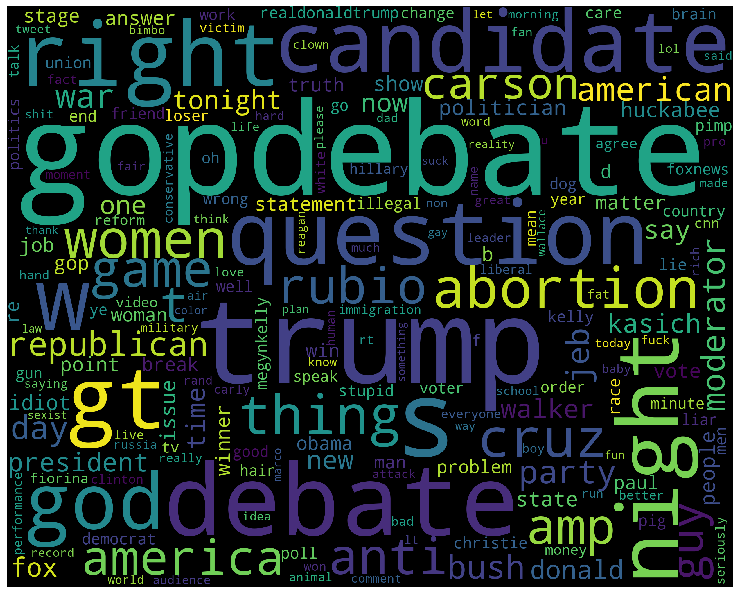

In [13]:
wordcloud_draw(w_features)

In [14]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

Finally we try to measure how the classifier algorithm scored.

In [15]:
neg_cnt = 0
pos_cnt = 0

for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1

for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 854/808 
[Positive]: 222/84 
